<a href="https://colab.research.google.com/github/skaria76/intro-ml-course-winter2025/blob/main/H_Datathon_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import io
uploaded = files.upload()

Saving Datathon #2 - Cardiovascular Health.csv to Datathon #2 - Cardiovascular Health.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Datathon #2 - Cardiovascular Health.csv']))
df

,id,gender,age,hypertension,heart_disease,ever_married,employment,residence_type,random_glucose,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private Sector,Urban,228.69,36.6,Former Smoker,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,Never Smoker,1
2,31112,Male,80,0,1,Yes,Private Sector,Rural,105.92,32.5,Never Smoker,1
3,60182,Female,49,0,0,Yes,Private Sector,Urban,171.23,34.4,Active Smoker,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,Never Smoker,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4249,18234,Female,80,1,0,Yes,Private Sector,Urban,83.75,NaN,Never Smoker,0
4250,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,Never Smoker,0
4251,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,Never Smoker,0
4252,37544,Male,51,0,0,Yes,Private Sector,Rural,166.29,25.6,Former Smoker,0


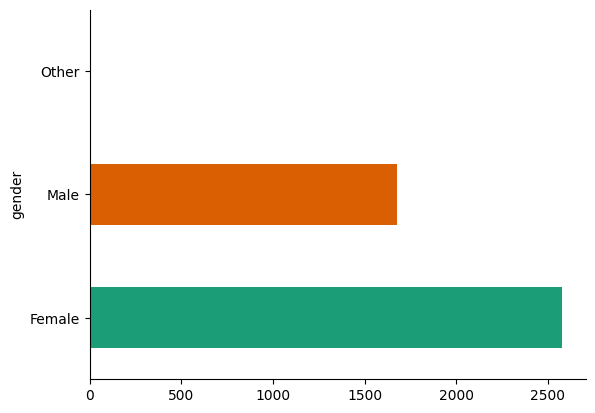

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

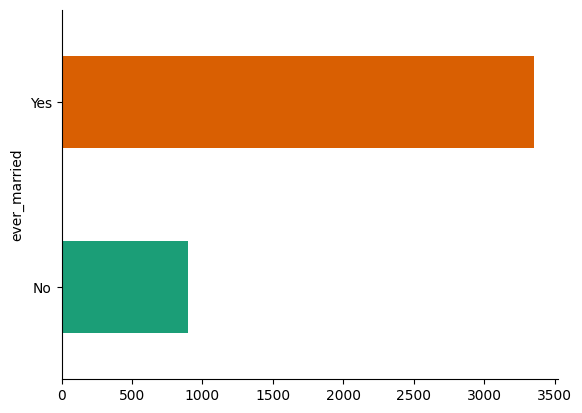

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('ever_married').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

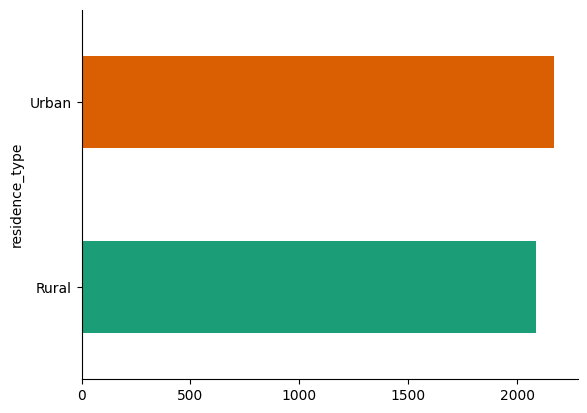

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('residence_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

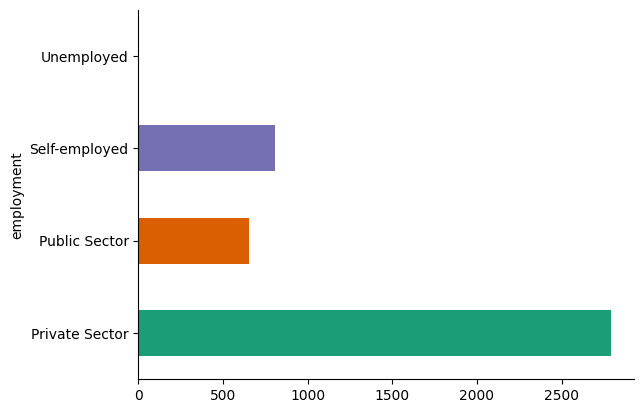

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('employment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

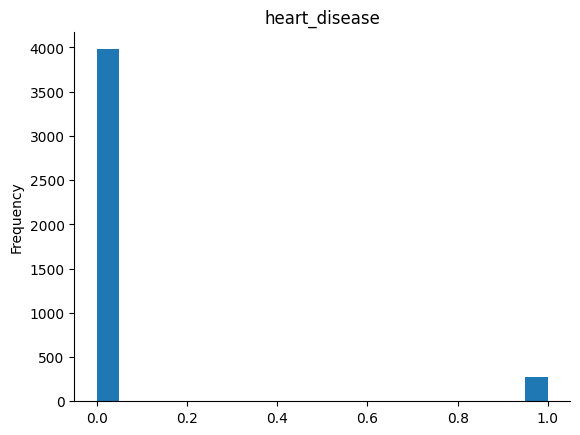

In [ ]:
from matplotlib import pyplot as plt
df['heart_disease'].plot(kind='hist', bins=20, title='heart_disease')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
hd_counts = stroke_data['heart_disease'].value_counts()
print(hd_counts)

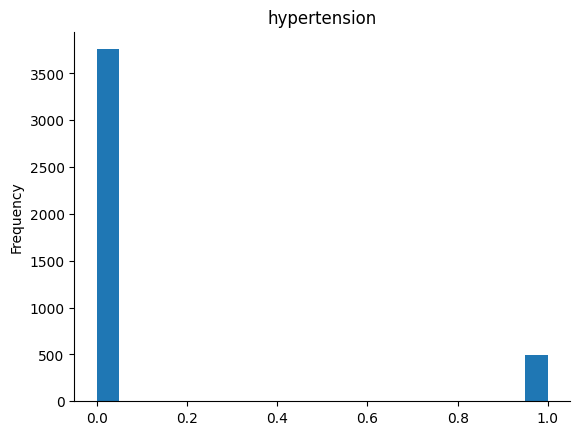

In [ ]:
from matplotlib import pyplot as plt
df['hypertension'].plot(kind='hist', bins=20, title='hypertension')
plt.gca().spines[['top', 'right',]].set_visible(False)

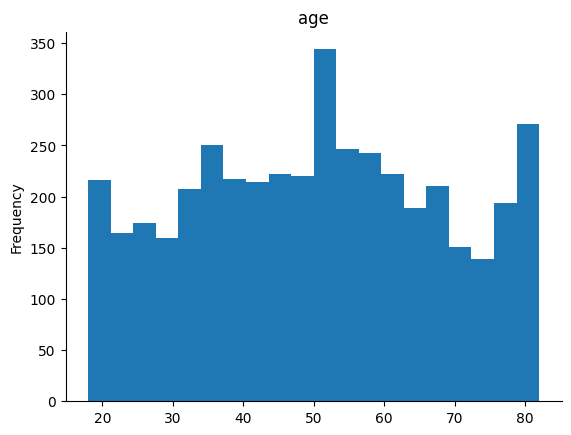

In [ ]:
from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
print(df.shape)

(4254, 12)


In [ ]:
# List the columns of the dataframe
print(df.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'employment', 'residence_type', 'random_glucose', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [ ]:
print(df.describe())

                 id          age  hypertension  heart_disease  random_glucose  \
count   4254.000000  4254.000000   4254.000000    4254.000000     4254.000000   
mean   36596.556653    50.202163      0.116831       0.064645      108.514394   
std    21177.398549    17.829035      0.321257       0.245927       47.769400   
min       84.000000    18.000000      0.000000       0.000000       55.120000   
25%    17887.000000    36.000000      0.000000       0.000000       77.482500   
50%    37089.500000    50.500000      0.000000       0.000000       92.465000   
75%    54771.000000    64.000000      0.000000       0.000000      116.135000   
max    72918.000000    82.000000      1.000000       1.000000      271.740000   

               bmi       stroke  
count  4073.000000  4254.000000  
mean     30.432752     0.058063  
std       7.235143     0.233890  
min      11.300000     0.000000  
25%      25.400000     0.000000  
50%      29.200000     0.000000  
75%      34.200000     0.000000 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

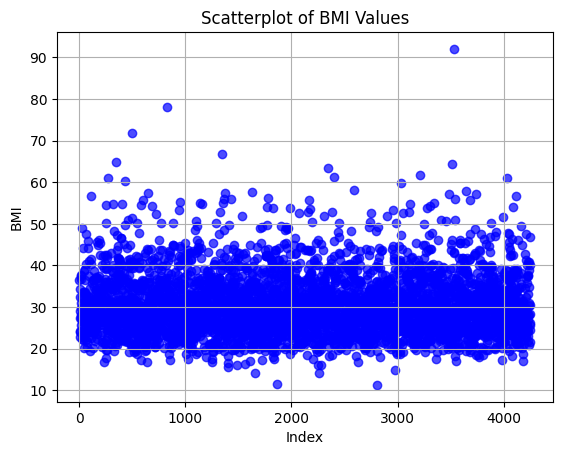

In [ ]:
plt.scatter(df.index, df["bmi"], color="blue", alpha=0.7)
plt.title("Scatterplot of BMI Values")
plt.xlabel("Index")
plt.ylabel("BMI")
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
print(df.isnull().sum())

id                  0
gender              0
age                 0
hypertension        0
heart_disease       0
ever_married        0
employment          0
residence_type      0
random_glucose      0
bmi               181
smoking_status      0
stroke              0
dtype: int64


In [ ]:
# Using the map() function to transform the 'gender' column
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

In [ ]:
df


,id,gender,age,hypertension,heart_disease,ever_married,employment,residence_type,random_glucose,bmi,smoking_status,stroke
0,9046,0.0,67,0,1,Yes,Private Sector,Urban,228.69,36.6,Former Smoker,1
1,51676,1.0,61,0,0,Yes,Self-employed,Rural,202.21,NaN,Never Smoker,1
2,31112,0.0,80,0,1,Yes,Private Sector,Rural,105.92,32.5,Never Smoker,1
3,60182,1.0,49,0,0,Yes,Private Sector,Urban,171.23,34.4,Active Smoker,1
4,1665,1.0,79,1,0,Yes,Self-employed,Rural,174.12,24.0,Never Smoker,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4249,18234,1.0,80,1,0,Yes,Private Sector,Urban,83.75,NaN,Never Smoker,0
4250,44873,1.0,81,0,0,Yes,Self-employed,Urban,125.20,40.0,Never Smoker,0
4251,19723,1.0,35,0,0,Yes,Self-employed,Rural,82.99,30.6,Never Smoker,0
4252,37544,0.0,51,0,0,Yes,Private Sector,Rural,166.29,25.6,Former Smoker,0


In [ ]:
# Using the map() function to transform the 'ever married' column to 0 and 1
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})

In [ ]:
# Using the map() function to transform the 'employment' column to 0, 1, 2, 3
df['employment'] = df['employment'].map({'Unemployed': 0, 'Self-employed': 1, 'Private Sector': 2, 'Public Sector': 3})

In [ ]:
# Using the map() function to transform the 'residence type' column to 0 or 1
df['residence_type'] = df['residence_type'].map({'Urban': 0, 'Rural': 1})

In [ ]:
# Using the map() function to transform the 'smoking status' column to 0, 1, 2, 3
df['smoking_status'] = df['smoking_status'].map({'Unknown': 0, 'Never Smoker': 1, 'Former Smoker': 2, 'Active Smoker': 3})

In [ ]:
X = df.drop('stroke', axis=1)
y = df['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,employment,residence_type,random_glucose,bmi,smoking_status,stroke
0,9046,0.0,67,0,1,1,2,0,228.69,36.6,2,1
1,51676,1.0,61,0,0,1,1,1,202.21,NaN,1,1
2,31112,0.0,80,0,1,1,2,1,105.92,32.5,1,1
3,60182,1.0,49,0,0,1,2,0,171.23,34.4,3,1
4,1665,1.0,79,1,0,1,1,1,174.12,24.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4249,18234,1.0,80,1,0,1,2,0,83.75,NaN,1,0
4250,44873,1.0,81,0,0,1,1,0,125.20,40.0,1,0
4251,19723,1.0,35,0,0,1,1,1,82.99,30.6,1,0
4252,37544,0.0,51,0,0,1,2,1,166.29,25.6,2,0


In [ ]:
df['bmi'].fillna(df['bmi'].median(), inplace=True)


In [ ]:
print(df.isnull().sum())


id                0
gender            1
age               0
hypertension      0
heart_disease     0
ever_married      0
employment        0
residence_type    0
random_glucose    0
bmi               0
smoking_status    0
stroke            0
dtype: int64


In [ ]:
# Function to detect and count outliers using IQR
def count_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), outliers

# Count and display outliers for random_glucose
count_glucose, outliers_glucose = count_outliers_iqr(df, 'random_glucose')
print(f"Number of outliers in 'random_glucose': {count_glucose}")

# Count and display outliers for bmi
count_bmi, outliers_bmi = count_outliers_iqr(df, 'bmi')
print(f"Number of outliers in 'bmi': {count_bmi}")



Number of outliers in 'random_glucose': 594
Number of outliers in 'bmi': 128


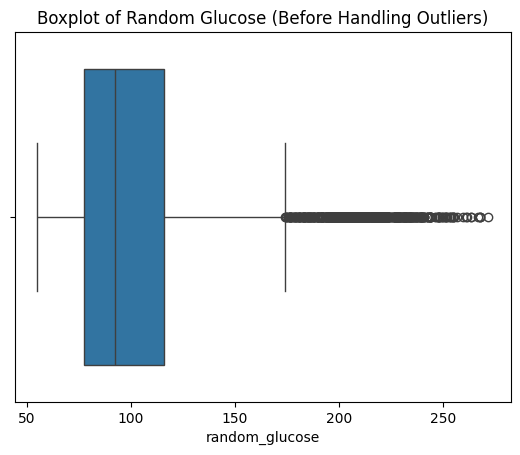

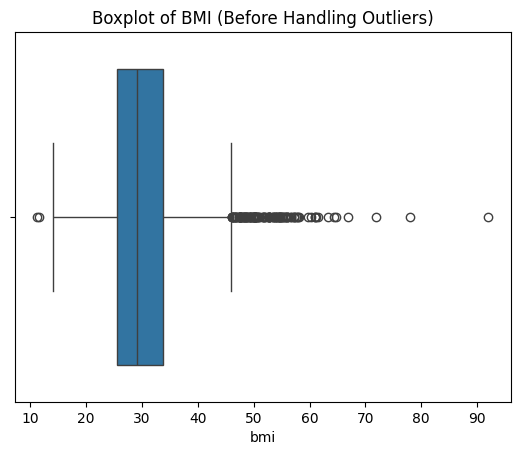

In [ ]:
import seaborn as sns

# Before handling outliers
sns.boxplot(x=df['random_glucose'])
plt.title('Boxplot of Random Glucose (Before Handling Outliers)')
plt.show()

sns.boxplot(x=df['bmi'])
plt.title('Boxplot of BMI (Before Handling Outliers)')
plt.show()


In [ ]:
# Calculate IQR for BMI
Q1_bmi = df['bmi'].quantile(0.25)
Q3_bmi = df['bmi'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi

# Define the bounds
lower_bound_bmi = Q1_bmi - 1.5 * IQR_bmi
upper_bound_bmi = Q3_bmi + 1.5 * IQR_bmi
# Remove outliers for BMI
df = df[~((df['bmi'] < lower_bound_bmi) | (df['bmi'] > upper_bound_bmi))]


In [ ]:
# Check the number of observations (rows) after removing outliers
print(f"Number of observations after removing outliers: {df.shape[0]}")


Number of observations after removing outliers: 4126


In [ ]:
print("Missing values in 'gender':", df['gender'].isnull().sum())


Missing values in 'gender': 1


In [ ]:
# Drop rows where 'gender' is missing
df = df.dropna(subset=['gender'])

# Verify the missing values are removed
print("Missing values in 'gender' after removal:", df['gender'].isnull().sum())


Missing values in 'gender' after removal: 0


In [ ]:
# Split the data into features and target variable
X = df.drop('stroke', axis=1)
y = df['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform on the training set
X_test = scaler.transform(X_test)        # transform the test set

In [ ]:
# Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

# The penalty parameter is used to specify the norm used in the penalization: l1 or l2 regularization.
# The C parameter represents inverse of regularization strength, smaller values specify stronger regularization.
# The solver parameter specifies the algorithm to use in the optimization problem.

LogisticRegression(solver='liblinear')

In [ ]:
 #Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[759   0]
 [ 66   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       759
           1       0.00      0.00      0.00        66

    accuracy                           0.92       825
   macro avg       0.46      0.50      0.48       825
weighted avg       0.85      0.92      0.88       825



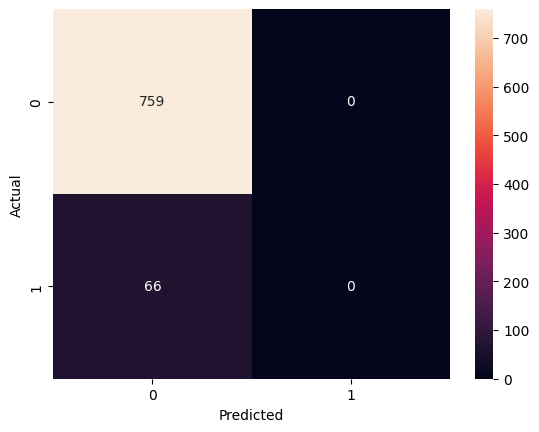

In [ ]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

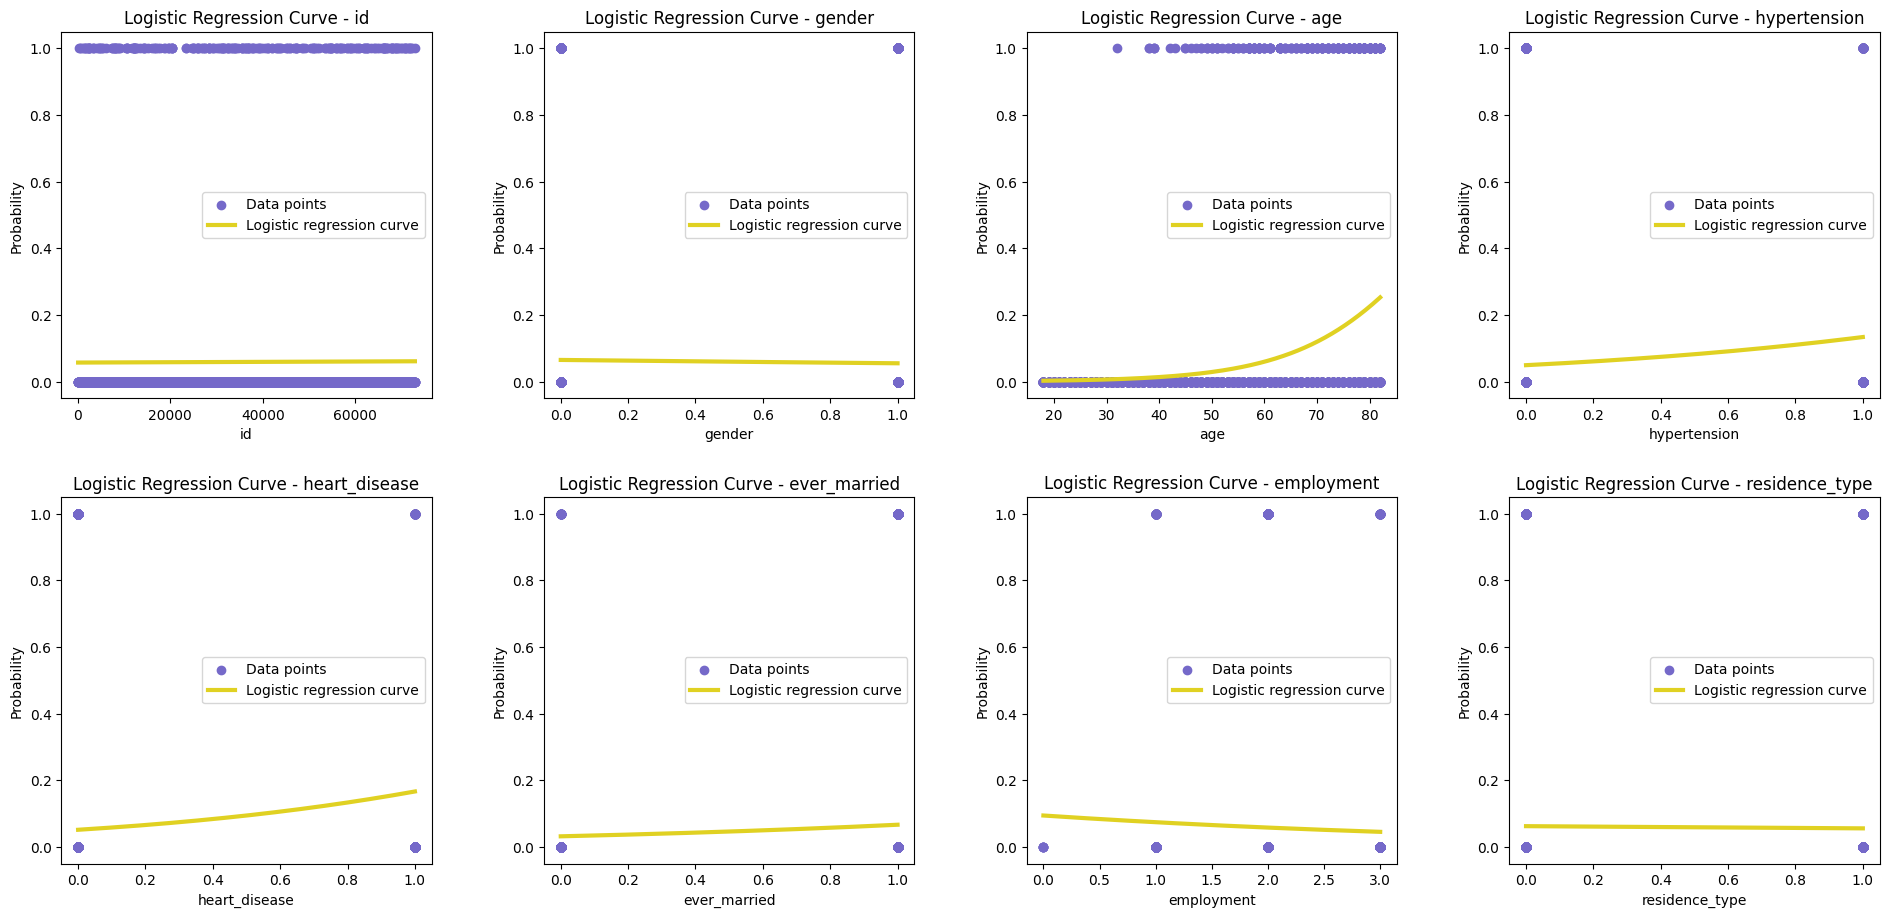

In [ ]:
# Create logistic regression object
log_reg = LogisticRegression()

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
fig.tight_layout(pad=5.0)  # Adds padding between subplots

for i, feature in enumerate(df.columns[:-1]):  # Exclude 'Outcome' column
    row = i // 4  # Determine row index
    col = i % 4   # Determine column index

    # Reshape the feature and outcome arrays to fit the model
    X = df[[feature]]
    y = df['stroke']

    # Fit logistic regression model
    log_reg.fit(X, y)

    # Get min and max values of the feature for plotting
    x_test = np.linspace(X.min(), X.max(), 300)

    # Get the probability for each value in the range
    prob = log_reg.predict_proba(x_test)[:, 1]

    # Plot the data points
    axs[row, col].scatter(X, y, color='#7569c9', label='Data points')

    # Plot the sigmoid curve
    axs[row, col].plot(x_test, prob, color='#e0d122', lw=3, label='Logistic regression curve' )

    axs[row, col].set_title(f'Logistic Regression Curve - {feature}')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Probability')
    axs[row, col].legend()

plt.show()

In [ ]:
import statsmodels.api as sm

# Separate features and target variable
X = df.drop('stroke', axis=1)
y = df['stroke']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.185524
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 4125
Model:                          Logit   Df Residuals:                     4113
Method:                           MLE   Df Model:                           11
Date:                Tue, 28 Jan 2025   Pseudo R-squ.:                  0.1741
Time:                        18:20:22   Log-Likelihood:                -765.29
converged:                       True   LL-Null:                       -926.58
Covariance Type:            nonrobust   LLR p-value:                 1.506e-62
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -8.2128      0.689    -11.916      0.000      -9.564      -6.862
id              1

Confusion Matrix:
 [[532 227]
 [ 13  53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.70      0.82       759
           1       0.19      0.80      0.31        66

    accuracy                           0.71       825
   macro avg       0.58      0.75      0.56       825
weighted avg       0.91      0.71      0.78       825



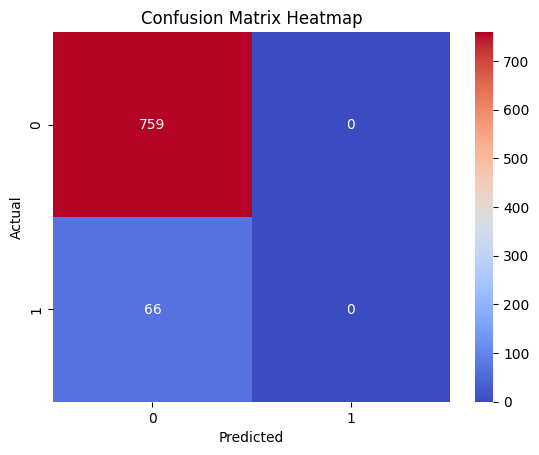

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Exclude specific columns and split into features and target variable
X = df.drop(['stroke', 'id', 'gender', 'ever_married', 'employment', 'residence_type', 'bmi', 'smoking_status'], axis=1)
y = df['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform on the training set
X_test = scaler.transform(X_test)        # Transform the test set

# Train logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', class_weight='balanced')  # Add class_weight='balanced' if class imbalance exists
log_reg.fit(X_train, y_train)

# Model evaluation
y_pred = log_reg.predict(X_test)

# Confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


# Visualize confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')  # fmt='d' ensures integers in cells
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [ ]:
import pandas as pd

# Load the dataset (replace 'your_file.csv' with the actual file name)
df = pd.read_csv('Datathon #2 - Cardiovascular Health.csv')

# Check the first few rows to confirm it loaded correctly
print(df.head())



      id  gender  age  hypertension  heart_disease ever_married  \
0   9046    Male   67             0              1          Yes   
1  51676  Female   61             0              0          Yes   
2  31112    Male   80             0              1          Yes   
3  60182  Female   49             0              0          Yes   
4   1665  Female   79             1              0          Yes   

       employment residence_type  random_glucose   bmi smoking_status  stroke  
0  Private Sector          Urban          228.69  36.6  Former Smoker       1  
1   Self-employed          Rural          202.21   NaN   Never Smoker       1  
2  Private Sector          Rural          105.92  32.5   Never Smoker       1  
3  Private Sector          Urban          171.23  34.4  Active Smoker       1  
4   Self-employed          Rural          174.12  24.0   Never Smoker       1  


Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Confusion Matrix:
 [[606 196]
 [ 16  33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.76      0.85       802
           1       0.14      0.67      0.24        49

    accuracy                           0.75       851
   macro avg       0.56      0.71      0.54       851
weighted avg       0.93      0.75      0.82       851

ROC-AUC Score: 0.7959183673469388
Adjusted Confusion Matrix:
 [[471 331]
 [  5  44]]
Adjusted Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.59      0.74       802
           1       0.12      0.90      0.21        49

    accuracy                           0.61       851
   macro avg       0.55      0.74      0.47       851
weighted avg       0.94      0.61      0.71       851



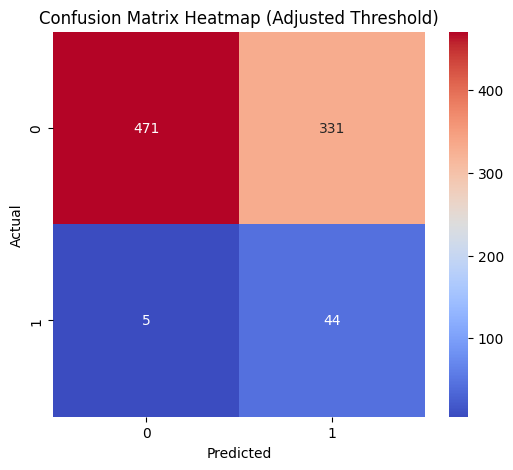

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Exclude non-relevant features and define features and target
X = df.drop(['stroke', 'id', 'gender', 'ever_married', 'employment', 'residence_type', 'bmi', 'smoking_status'], axis=1)
y = df['stroke']

# Add interaction terms (age × hypertension, age × glucose)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy=0.75, random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Normalize the data
scaler = StandardScaler()
X_train_sm = scaler.fit_transform(X_train_sm)
X_test = scaler.transform(X_test)

# Hyperparameter tuning with GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
grid_search = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_sm, y_train_sm)

# Best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Evaluate model
print("Best Parameters:", grid_search.best_params_)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))

# Adjust classification threshold
threshold = 0.3  # Lowering the threshold for better recall
y_pred_adj = (y_pred_prob >= threshold).astype(int)
print("Adjusted Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adj))
print("Adjusted Classification Report:\n", classification_report(y_test, y_pred_adj))

# Visualize confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_adj), annot=True, fmt='d', cmap='coolwarm')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap (Adjusted Threshold)')
plt.show()


✅ Improved Stroke Detection: The model now correctly predicts 44 stroke cases, compared to 0 in the previous model (a significant improvement).
✅ Drastically Lower False Negatives (FN = 5): The number of missed strokes has been significantly reduced, which is crucial in healthcare settings.
⚠️ Increased False Positives (FP = 331): More non-stroke cases are being classified incorrectly as stroke, meaning the model might be overpredicting strokes.